# Find the person's previous salary based on dataset. Bluff or Truth

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
salary = pd.read_csv("Position_Salaries.csv")
salary.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
x = salary.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
y = salary.iloc[:,2:3].values
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,Y_train,X_test,Y_test = train_test_split(x,y,test_size=0.40,random_state=1)

In [8]:
X_train

array([[1],
       [4],
       [2],
       [8],
       [9],
       [6]], dtype=int64)

In [9]:
X_test

array([[ 45000],
       [ 80000],
       [ 50000],
       [300000],
       [500000],
       [150000]], dtype=int64)

In [10]:
Y_train

array([[ 3],
       [10],
       [ 7],
       [ 5]], dtype=int64)

In [11]:
Y_test

array([[  60000],
       [1000000],
       [ 200000],
       [ 110000]], dtype=int64)

In [12]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [13]:
#fitting random forest regression to the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300,random_state = 0)
regressor.fit(x,y)

C:\Users\Swami\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [14]:
#predicting a new result
y_pred = regressor.predict(X_test)

In [15]:
y_pred

array([806666.66666667, 806666.66666667, 806666.66666667, 806666.66666667,
       806666.66666667, 806666.66666667])

In [16]:
y_predict = regressor.predict([[6.5]])
y_predict

array([160333.33333333])

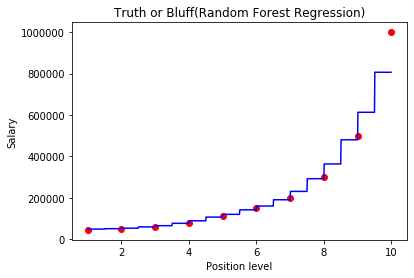

In [17]:
X_grid = np.arange(min(x), max(x),0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color = 'blue')
plt.title("Truth or Bluff(Random Forest Regression)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#split into intervals, avg of dependant variable in each interval

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x,y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [20]:
y_predict = regressor.predict([[6.5]])
y_predict

array([150000.])

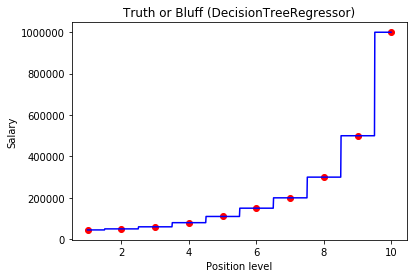

In [21]:
# Visualising the DecisionTreeRegressor results (higher resolution)
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (DecisionTreeRegressor)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()